### 0. Imports

In [7]:
%load_ext autoreload
%autoreload 2

# Data transformation
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np


# Visualizations
# -----------------------------------------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt

# Progress loops
# -----------------------------------------------------------------------
from tqdm import tqdm

# Handle warnings
# -----------------------------------------------------------------------
import warnings
warnings.filterwarnings("once")

# modify system variables
# -----------------------------------------------------------------------
import sys
sys.path.append("..") # append parent folder to path

# modify operating system structures
# -----------------------------------------------------------------------
import os

# import support functions
# -----------------------------------------------------------------------
import src.soporte_eda as se
import src.soporte_preprocesamiento as sp
import src.soporte_clustering as sc
import src.data_visualization_support as dvs


# statistics functions
# -----------------------------------------------------------------------
from scipy.stats import pearsonr, spearmanr, pointbiserialr
from scipy.stats.mstats import winsorize
from scipy.stats import trim_mean

# work with serialized pickle files
# -----------------------------------------------------------------------
import pickle


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# 1. Introduction to clustering results analysis

The purpose of this notebook is to analyse the resulting clusters selected from the modelling of clusters to provide recommendations and business actions to leverage the segmentation of customers performed.

In [8]:
global_superstore = pd.read_pickle("../data/cleaned/global_superstore.pkl")
global_superstore.head(2)

,row_id,order_id,order_date,ship_date,ship_mode,customer_id,customer_name,segment,market,product_id,category,sub-category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority
0,32298,CA-2012-124891,2012-07-31,2012-07-31,Same Day,RH-19495,Rick Hansen,Consumer,US,PR-0,Technology,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,2309.650,7,0.0,762.1845,933.57,Critical
1,26341,IN-2013-77878,2013-02-05,2013-02-05,Second Class,JR-16210,Justin Ritter,Corporate,APAC,PR-1,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,-288.7650,923.63,Critical


In [9]:
customer_cluster_labels = pd.read_pickle("../data/clusters/customer_Aggregated_v1_k4.pkl")
customer_cluster_labels.head(2)

,median_orders_month,median_spending_order,median_discount,discount_corr,clusters_kmeans
customer_id,,,,,
AA-10315,1.0,270.60,0.000000,0.045609,2
AA-10375,1.0,90.48,0.024334,-0.072842,1


In [11]:
cluster_mapping = customer_cluster_labels["clusters_kmeans"].to_dict()
global_superstore["customer_cluster"] = global_superstore["customer_id"].map(cluster_mapping)

In [12]:
global_superstore.to_pickle("../data/clusters/global_superstore_clusters.pkl")

### Metric calculation

In [13]:
global_superstore["profit_prop"] = global_superstore["profit"] / global_superstore["sales"]

### Company profits per cluster

<Axes: xlabel='customer_cluster', ylabel='profit'>

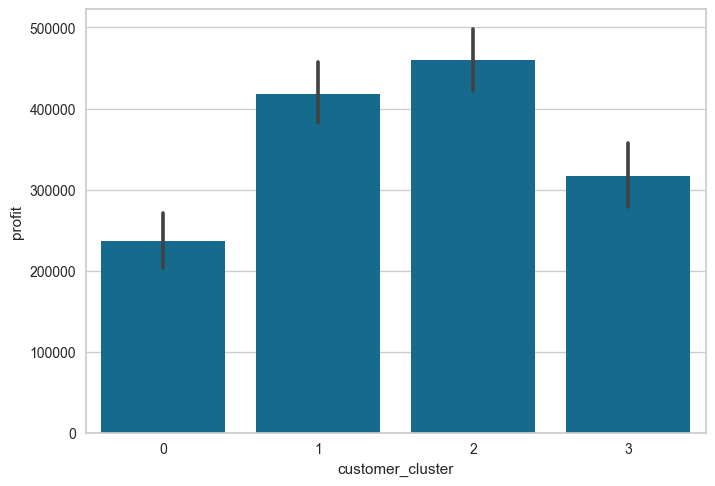

In [11]:
sns.barplot(data=global_superstore,
            x="customer_cluster",
            y="profit",
            estimator="sum")

### Company revenue per cluster

<Axes: xlabel='customer_cluster', ylabel='sales'>

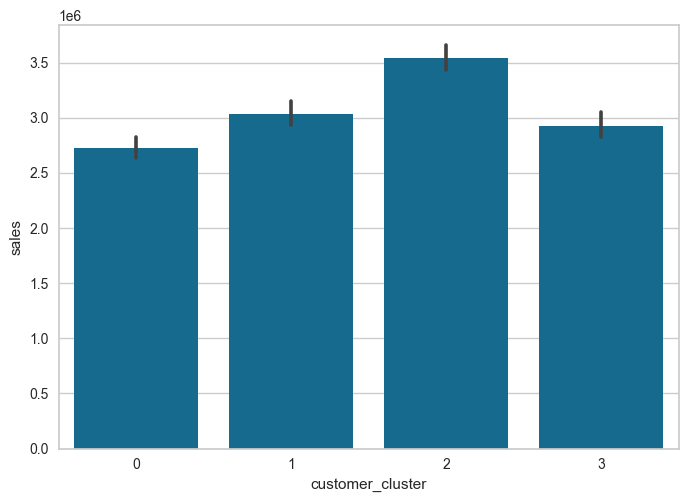

In [15]:
sns.barplot(data=global_superstore,
            x="customer_cluster",
            y="sales",
            estimator="sum")

### Profitability per cluster

<Axes: xlabel='customer_cluster', ylabel='profit_prop'>

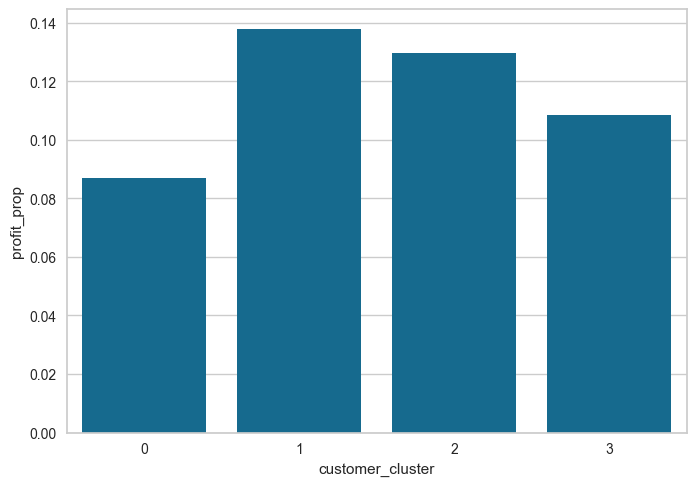

In [20]:
profitability = global_superstore.groupby("customer_cluster").agg(
                                                                    total_sales=("sales","sum"),
                                                                    total_profit=("profit","sum")
                                                                )
profitability["profit_prop"] = profitability["total_profit"]/profitability["total_sales"]
profitability

sns.barplot(data=profitability,
            x="customer_cluster",
            y="profit_prop")

### What quantities?

<Axes: xlabel='customer_cluster', ylabel='quantity'>

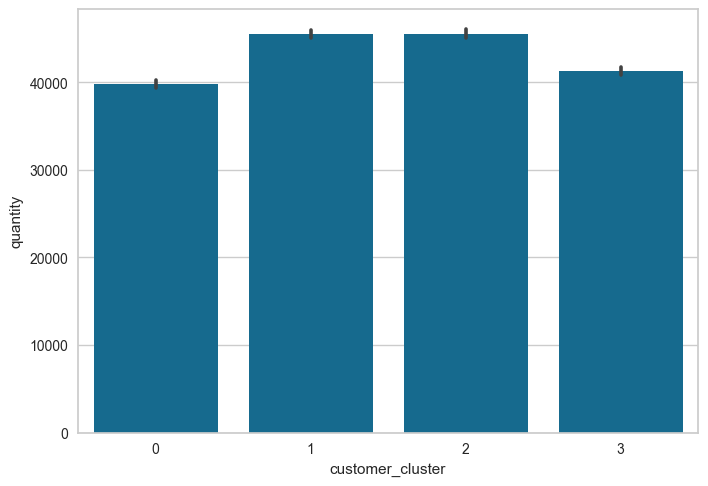

In [21]:
sns.barplot(data=global_superstore,
            x="customer_cluster",
            y="quantity",
            estimator="sum")

### What segments do they belong to?

In [29]:
global_superstore[global_superstore["customer_cluster"]=="1"].groupby("segment").agg(unique_customers=("customer_id","nunique"))

,unique_customers
segment,
Consumer,111
Corporate,55
Home Office,46


### What do these customers buy?

<Axes: xlabel='category', ylabel='quantity'>

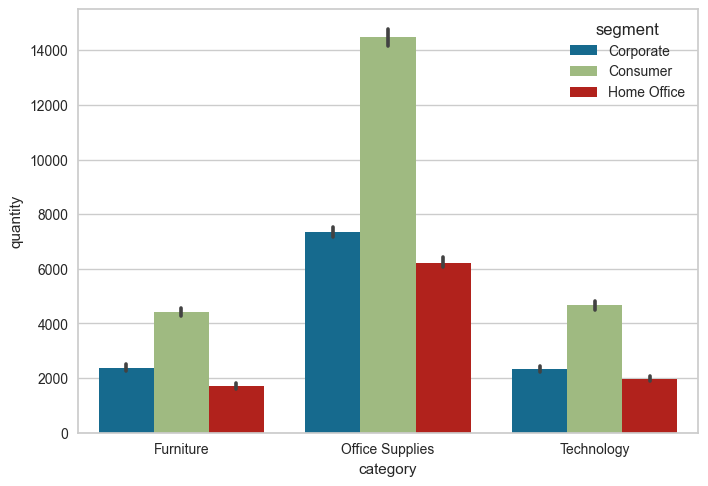

In [ ]:
sns.barplot(data=global_superstore[global_superstore["customer_cluster"]=="1"],
            x="category",
            y="quantity",
            hue="segment",
            estimator="sum")

<Axes: xlabel='sub-category', ylabel='quantity'>

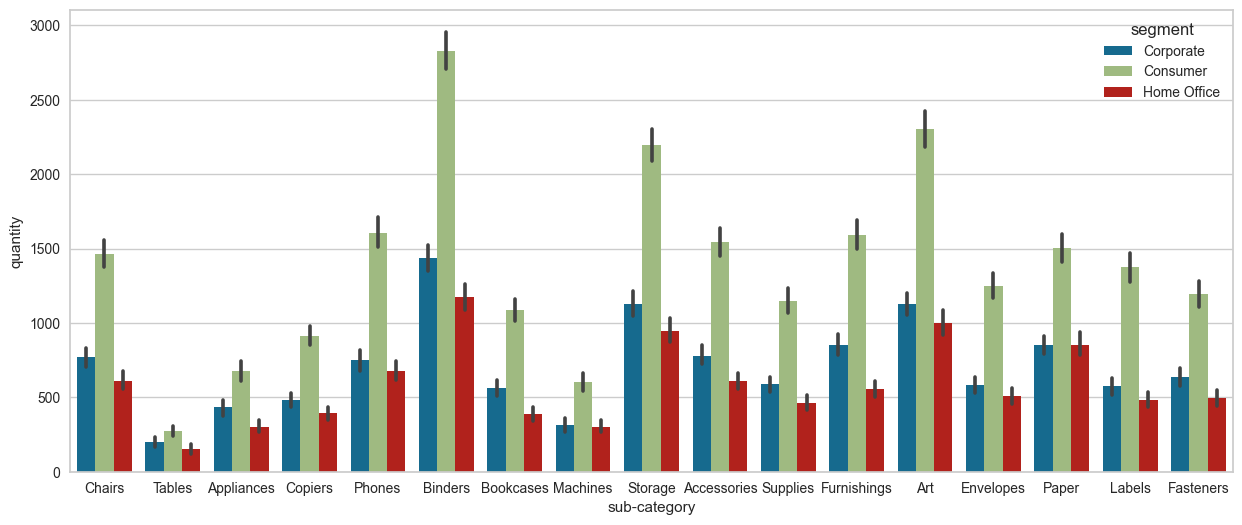

In [34]:
plt.figure(figsize=(15,6))
sns.barplot(data=global_superstore[global_superstore["customer_cluster"]=="1"],
            x="sub-category",
            y="quantity",
            hue="segment",
            estimator="sum")

<Axes: xlabel='sub-category', ylabel='profit'>

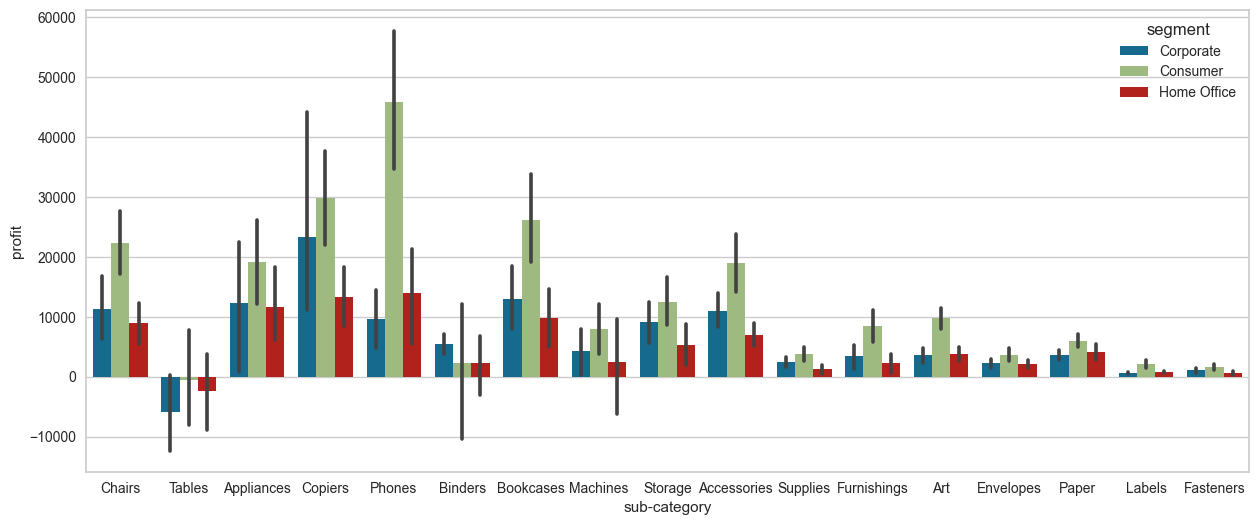

In [36]:
plt.figure(figsize=(15,6))
sns.barplot(data=global_superstore[global_superstore["customer_cluster"]=="1"],
            x="sub-category",
            y="profit",
            hue="segment",
            estimator="sum")

<Axes: xlabel='sub-category', ylabel='quantity'>

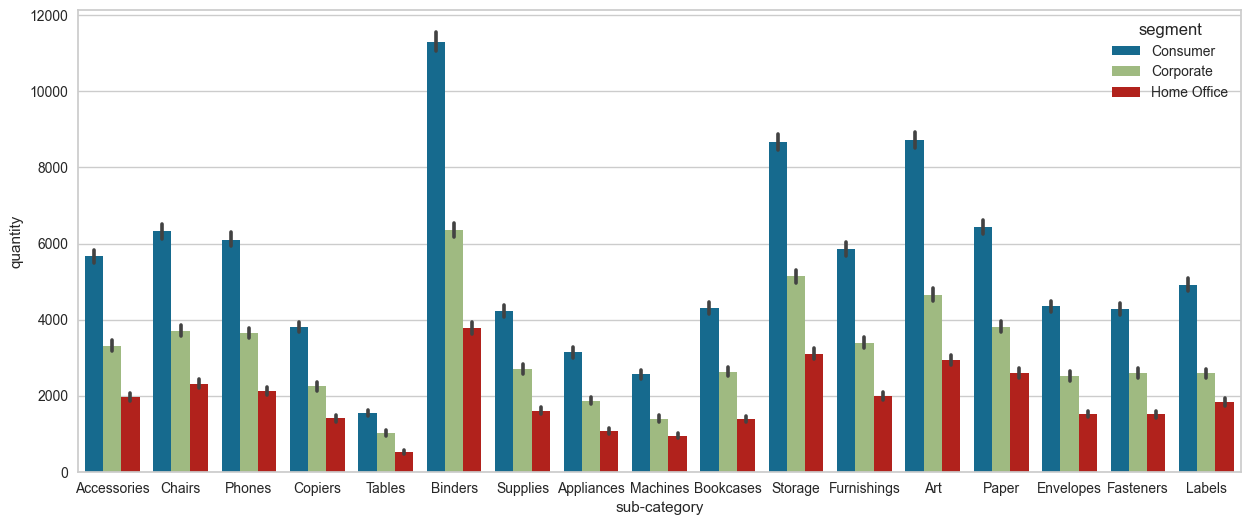

: 

In [ ]:
plt.figure(figsize=(15,6))
sns.barplot(data=global_superstore,
            x="sub-category",
            y="quantity",
            hue="segment",
            estimator="sum")